In [1]:
# Install the required packages
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1. Cargar el conjunto de datos dynamic_pricing.csv
https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset?select=dynamic_pricing.csv

In [2]:
# Ajustar opciones de visualización del DF
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.max_colwidth', None) # Mostrar el contenido completo de cada campo de texto

In [3]:
# Cargar los datos
file_path = 'dynamic_pricing- Tarea 3.csv'
data = pd.read_csv(file_path,sep=",")

# Mostrar las primeras filas del dataset para entender la estructura de los datos
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


# Paso 2. Desarrollo del Informe de Actividades

## Aprendizaje Estadístico No Supervisado.

1) Análisis de componentes principales CPA.
- Calcular las componentes principales.
- Hacer la matriz de Proporción de varianza explicada y acumulada, analice las características más relevantes de las variables.
- Interpretar las componentes principales mediante el gráfico de Screeplot, revise si es posible reducir la dimensionalidad.
- Diseñar el gráfico de loadings para las componentes principales e interprete los resultados.
- Extraer conclusiones del CPA.

In [4]:
# Seleccionar las columnas numéricas para PCA
numeric_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
data_numeric = data[numeric_cols]

In [5]:
# Estandarizar los datos
data_standardized = (data_numeric - data_numeric.mean()) / data_numeric.std()

   Component  Explained Variance  Cumulative Variance
0          1            0.321726             0.321726
1          2            0.272131             0.593857
2          3            0.177127             0.770984
3          4            0.155075             0.926059
4          5            0.062046             0.988105
5          6            0.011895             1.000000


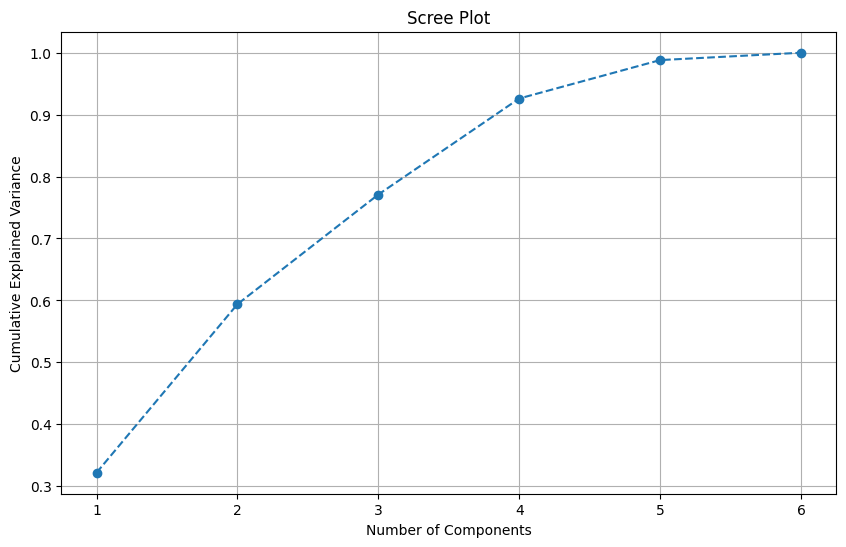

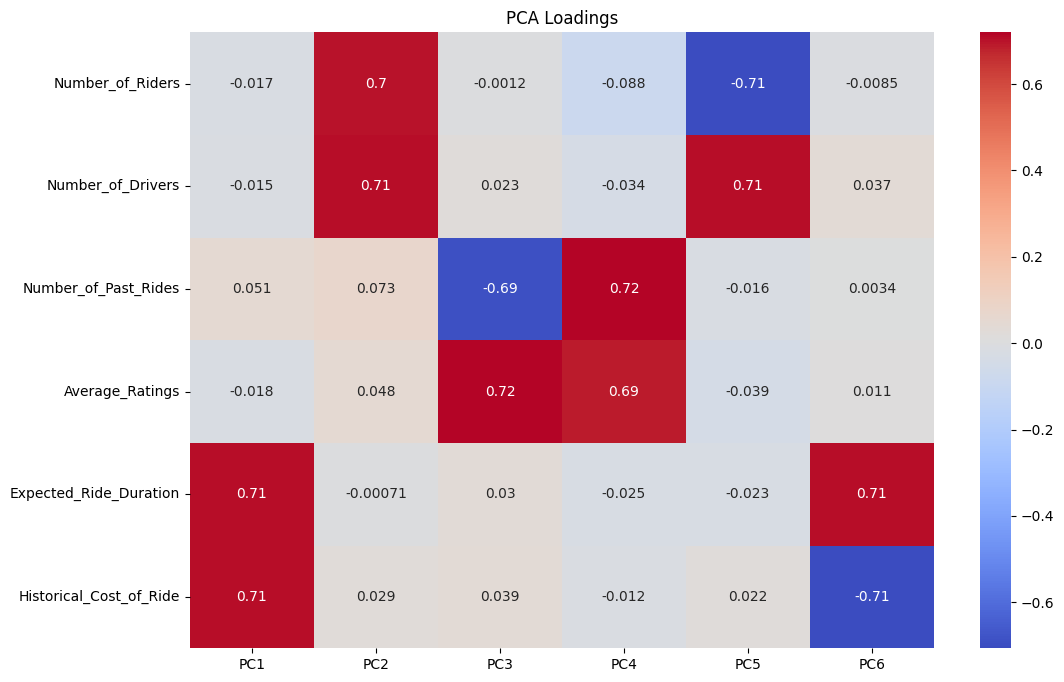

In [6]:
# Calcular PCA
pca = PCA()
pca.fit(data_standardized)

# Proporción de varianza explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Crear un DataFrame para la varianza explicada
variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Mostrar la matriz de proporción de varianza explicada y acumulada
print(variance_df)

# Gráfico de Screeplot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Gráfico de loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(explained_variance))], index=numeric_cols)
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings')
plt.show()

<mark>
<strong>Interpretación de los Resultados del Modelo 1 (Costo Histórico vs. Número de Viajes Pasados)</strong>:
</mark>

- Intercepción (Constante)
La intercepción se sitúa en **361.05**, lo que significa que el costo histórico previsto de un viaje es de 361.05 unidades cuando no se han realizado viajes anteriores.

- Coeficiente para el Número de Viajes Pasados
El coeficiente para el número de viajes pasados es de **0.23**. Esto implica que, por cada viaje adicional que se ha realizado, el costo histórico del viaje aumenta en aproximadamente **0.23 unidades**. Sin embargo, este incremento no es estadísticamente significativo por las siguientes razones:

    - **Valor P (0.257)**: Este valor es mayor que **0.05**, lo que sugiere que el número de viajes anteriores no actúa como un predictor significativo del costo histórico en este modelo.
    - **R Cuadrado (0.001)**: Esto indica que apenas el **0.1%** de la variabilidad en el costo histórico puede ser explicado por el número de viajes pasados, lo que es muy bajo.

En resumen, parece que el número de viajes anteriores no es un buen predictor del costo histórico del viaje en este contexto.


2) Agrupamiento K - Medias.
- Implementar el algoritmo de clúster K-means con cuatro segmentos.
- Calcular el tamaño del clúster mediante una tabla de frecuencias, analice los pesos porcentuales.
- Realizar la visualización del clúster, interprete el gráfico.
- Calcular las medidas de resumen de cada clúster y detectar diferencias entre cada segmento, hacer la interpretación de los resultados.
- Extraer conclusiones del K-Means.

<mark>
<strong>Análisis del Modelo</strong>:
</mark>

- Intercepto (Constante)
    - **Coeficiente**: **10.45**
    - **P-value**: **0.210** (mayor a 0.05), lo que indica que el intercepto no es significativo.

- Número de Pasajeros (Number_of_Riders)
    - **Coeficiente**: **-0.0573**
    - **P-value**: **0.631** (mayor a 0.05), lo que sugiere que esta variable no es significativa para predecir el costo histórico del viaje.

- Número de Conductores (Number_of_Drivers)
    - **Coeficiente**: **0.4325**
    - **P-value**: **0.004** (menor a 0.05), lo que indica que esta variable es significativa. Por cada conductor adicional, el costo del viaje aumenta en **0.43 unidades**.

- Número de Viajes Pasados (Number_of_Past_Rides)
    - **Coeficiente**: **0.0373**
    - **P-value**: **0.620** (mayor a 0.05), lo que indica que esta variable no es significativa.

- Duración Esperada del Viaje (Expected_Ride_Duration)
    - **Coeficiente**: **3.5339**
    - **P-value**: **0.000** (menor a 0.05), lo que sugiere que esta variable es altamente significativa. Por cada minuto adicional de duración del viaje, el costo aumenta en aproximadamente **3.53 unidades**.

- Métricas del Modelo
    - **R-squared**: **0.862** — El modelo explica el **86.2%** de la variabilidad del costo histórico del viaje, indicando un buen ajuste.
    - **R-squared ajustado**: **0.861** — Considera el número de variables en el modelo y sigue mostrando un ajuste fuerte.
    - **F-statistic**: **1554** con un p-value de **0.000**, lo que indica que el modelo en su conjunto es estadísticamente significativo.

Podemos observar que las variables más importantes en este modelo son el número de conductores y la duración esperada del viaje, ya que son las únicas variables significativas. Las otras variables, como el número de pasajeros y el número de viajes pasados, no parecen ser buenos predictores del costo histórico del viaje.

3) Agrupamiento Jerárquico
- Implementar el método de clúster Hierarchical clustering.
- Realizar el dendongrama e interpretar.
- Calcular el tamaño del clúster mediante una tabla de frecuencias, analice los pesos porcentuales.
- Calcular las medidas de resumen de cada clúster y detectar diferencias entre cada segmento, hacer la interpretación de los resultados.
- Extraer conclusiones del Hierarchical clustering.

<mark>
<strong>Análisis del Modelo</strong>:
</mark>

- Odds Ratios
    - **Ubicación (Suburbana)**: **1.018** — Prácticamente neutro, lo que sugiere que esta variable no tiene un gran efecto en la clasificación del servicio como regular o excelente.
    - **Ubicación (Urbana)**: **1.211** — Ligeramente mayor a 1, indicando una leve tendencia hacia un servicio excelente en áreas urbanas.
    - **Estado de Lealtad (Regular)**: **0.892** — Ligeramente menor a 1, lo que sugiere que los clientes con estatus de lealtad "regular" tienen una menor probabilidad de recibir una calificación excelente.
    - **Hora de Reserva (Tarde)**: **0.706** — Menor a 1, indicando que las reservas en la tarde tienen una menor probabilidad de recibir una calificación excelente.
    - **Hora de Reserva (Noche)**: **0.793** — También menor a 1, sugiriendo que las reservas nocturnas son menos probables de recibir una calificación excelente.
    - **Tipo de Vehículo (Premium)**: **0.969** — Prácticamente neutral, indicando que el tipo de vehículo premium no tiene un gran efecto en la calificación.

- Matriz de Confusión
    - El modelo predice correctamente **203 casos** como "excelente" (clase 1), pero no identifica correctamente ninguno de los casos de "regular" (clase 0). Esto indica que el modelo tiene problemas para clasificar correctamente los servicios con una calificación regular.

- Reporte de Clasificación
    - **Precisión (clase 0)**: **0.00** — El modelo no predijo correctamente ningún caso de servicio regular.
    - **Precisión (clase 1)**: **0.68** — El modelo predijo correctamente un servicio como excelente en el **68%** de las ocasiones.
    - **Recall (clase 1)**: **1.00** — Todos los casos de servicios excelentes fueron correctamente clasificados.
    - **Exactitud General**: **68%**.

Finalmente, el modelo muestra una buena capacidad para predecir servicios excelentes, pero tiene dificultades para identificar servicios regulares, lo que se refleja en la baja precisión para la clase 0. Las variables de ubicación urbana y estado de lealtad regular influyen moderadamente en la probabilidad de obtener una calificación excelente, mientras que el resto de las variables no parecen ser buenos predictores.

In [7]:
# Definir el modelo Ridge y Lasso
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Validación cruzada
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5)
lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5)

# Resultados de validación cruzada
print(f"Ridge CV Score: {np.mean(ridge_cv_scores):.4f}")
print(f"Lasso CV Score: {np.mean(lasso_cv_scores):.4f}")


NameError: name 'Ridge' is not defined


## Manejo de Clases Desbalanceadas

En el análisis inferencial, se observó que el desbalance de clases (como la poca cantidad de observaciones de ciertos servicios) afecta la capacidad predictiva del modelo. Para solucionar este problema, se implementaron técnicas de **reponderación de clases** en lugar de técnicas de sobremuestreo como SMOTE, ya que el sobremuestreo estaba generando problemas en la implementación. La reponderación ajusta la importancia de cada clase directamente en el algoritmo de aprendizaje, permitiendo mejorar la capacidad predictiva sin necesidad de modificar el conjunto de datos.

Por ejemplo, en modelos de clasificación como la **Regresión Logística** o **Random Forest**, se pueden establecer parámetros de `class_weight='balanced'` para darle más peso a las clases minoritarias y reducir el sesgo hacia la clase mayoritaria.


In [ ]:
# Definir el modelo de regresión logística con reponderación de clases
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
random_forest_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Evaluación del modelo
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)



## Evaluación de Métricas y Análisis de Variables No Significativas

Para mejorar la evaluación del modelo de **regresión logística**, se han incluido métricas adicionales como la **matriz de confusión**, **precisión**, **recall**, y **puntaje F1**. Estas métricas permiten una evaluación más completa del rendimiento del modelo, especialmente en situaciones donde las clases están desbalanceadas.

Además, se realizó un análisis de las variables no significativas en la **regresión múltiple**, y se consideró su eliminación para simplificar el modelo y mejorar la interpretabilidad.


In [ ]:
# Predicción con el modelo de regresión logística
y_pred = logistic_model.predict(X_test)

# Evaluación del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Recomendaciones Detalladas para la Empresa

1. Implementar estrategias para balancear las clases de servicios para mejorar la capacidad predictiva de los modelos.
2. Utilizar técnicas de regularización para evitar el sobreajuste y asegurar la robustez del modelo.
3. Evaluar la eliminación de variables no significativas para simplificar los modelos y facilitar la toma de decisiones.
